# Multi-parametric global optimization

This tutorial shows how to find global minimum of multivariable function calculated by Modelica model. Cells are evaluated by pressing `Shift-Enter`.

## 1. PyFmi library

Import pyfmi library:

In [1]:
from pyfmi import load_fmu

if error happens, you need to install pyfmi, e.g. `conda install -c conda-forge pyfmi.`

## 2. Simulate FMU in Python

The objective function to be minimized is saved in file CostFunction.mo in the same directory as this notebook. The goal is to find values for the three parameters x, y, and z that minimize the value of the variable v (which is constant over time). The generated CostFunction.fmu file is stored in the same directory. You can create your own Modelica model with another objective function. Menu item File -> FMI -> Export FMU opens the dialog to generated fmu in OpenModelica OMEdit.

Now load the FMU:

In [7]:
model = load_fmu('CostFunction.fmu')

Create default simulation options, we will set it further

In [8]:
opts = model.simulate_options()

Define the function that runs the model with different parameter values:

In [9]:
def simulateWithParam(x,y,z,sopts=opts):
    model.reset()
    model.instantiate()
    model.set('x',x)
    model.set('y',y)
    model.set('z',z)
    res = model.simulate(final_time=1, options = sopts)
    return res

Check the simulation with given parameter values

In [10]:
r1 = simulateWithParam(0,0,0)

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.012212528992677107 seconds.


Display the time array from results:

In [11]:
r1['time']

array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014, 0.016,
       0.018, 0.02 , 0.022, 0.024, 0.026, 0.028, 0.03 , 0.032, 0.034,
       0.036, 0.038, 0.04 , 0.042, 0.044, 0.046, 0.048, 0.05 , 0.052,
       0.054, 0.056, 0.058, 0.06 , 0.062, 0.064, 0.066, 0.068, 0.07 ,
       0.072, 0.074, 0.076, 0.078, 0.08 , 0.082, 0.084, 0.086, 0.088,
       0.09 , 0.092, 0.094, 0.096, 0.098, 0.1  , 0.102, 0.104, 0.106,
       0.108, 0.11 , 0.112, 0.114, 0.116, 0.118, 0.12 , 0.122, 0.124,
       0.126, 0.128, 0.13 , 0.132, 0.134, 0.136, 0.138, 0.14 , 0.142,
       0.144, 0.146, 0.148, 0.15 , 0.152, 0.154, 0.156, 0.158, 0.16 ,
       0.162, 0.164, 0.166, 0.168, 0.17 , 0.172, 0.174, 0.176, 0.178,
       0.18 , 0.182, 0.184, 0.186, 0.188, 0.19 , 0.192, 0.194, 0.196,
       0.198, 0.2  , 0.202, 0.204, 0.206, 0.208, 0.21 , 0.212, 0.214,
       0.216, 0.218, 0.22 , 0.222, 0.224, 0.226, 0.228, 0.23 , 0.232,
       0.234, 0.236, 0.238, 0.24 , 0.242, 0.244, 0.246, 0.248, 0.25 ,
       0.252, 0.254,

Define the function to plot results:

In [12]:
def plot(x,y,z=None,labelx=None,labely=None,labelz=None):
    %matplotlib inline
    import matplotlib.pyplot as plt
    fig = plt.figure()
    plt.plot(x,y,'r',label=labelx)
    if z is not None:
        plt.plot(x,z,'b')
    plt.show()


Make sure the "v" is constant:

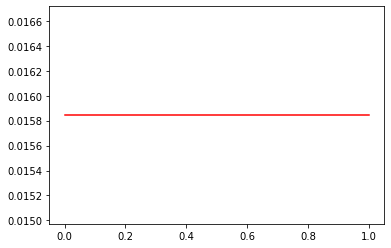

In [13]:
plot(r1['time'],r1['v'])

Display the "v" array:

In [14]:
r1['v']

array([0.01584453, 0.01584453, 0.01584453, 0.01584453, 0.01584453,
       0.01584453, 0.01584453, 0.01584453, 0.01584453, 0.01584453,
       0.01584453, 0.01584453, 0.01584453, 0.01584453, 0.01584453,
       0.01584453, 0.01584453, 0.01584453, 0.01584453, 0.01584453,
       0.01584453, 0.01584453, 0.01584453, 0.01584453, 0.01584453,
       0.01584453, 0.01584453, 0.01584453, 0.01584453, 0.01584453,
       0.01584453, 0.01584453, 0.01584453, 0.01584453, 0.01584453,
       0.01584453, 0.01584453, 0.01584453, 0.01584453, 0.01584453,
       0.01584453, 0.01584453, 0.01584453, 0.01584453, 0.01584453,
       0.01584453, 0.01584453, 0.01584453, 0.01584453, 0.01584453,
       0.01584453, 0.01584453, 0.01584453, 0.01584453, 0.01584453,
       0.01584453, 0.01584453, 0.01584453, 0.01584453, 0.01584453,
       0.01584453, 0.01584453, 0.01584453, 0.01584453, 0.01584453,
       0.01584453, 0.01584453, 0.01584453, 0.01584453, 0.01584453,
       0.01584453, 0.01584453, 0.01584453, 0.01584453, 0.01584

## 3. Define the objective
Define the objective function in the format required by the optimization algorithm:

In [15]:
def objFun(p):
    r = simulateWithParam(p[0],p[1],p[2],sopts=opts)
    return r['v'][-1]
    

Test the objective function:

In [16]:
objFun([0.0,0.0,0.0])

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.03321697200590279 seconds.


0.01584453067900271

## 4. The optimization

Import the scipi.optimize module:

In [17]:
import scipy.optimize as optim


Run the optimization basinhopping algorithm with initial parameter values x=0, y=0, z=0 and maximally 100 iterations. It take several minutes to finish:

In [ ]:
ret = optim.basinhopping(objFun, [0,0,0], niter = 100)

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.048593145998893306 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.010181794001255184 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.016884952012333088 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.020013467001263052 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.03243401600047946 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.02343701799691189 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.021131035988219082 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.011651116990833543 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.018891910993261263 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.009128582998528145 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.01585851599520538 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.010061954002594575 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.011589096000534482 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.012202785990666598 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.023128307992010377 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9



Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.009175622995826416 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.01090963500610087 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.010859604997676797 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.010218512994470075 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.011456367996288463 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.009108839993132278 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.016381311987061054 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.01068087900057435 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.01084846499725245 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.02615920799144078 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.017499265988590196 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.01159258300322108 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.010029731012764387 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.01506103300198447 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.028457710999646224 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.014433750999160111 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.024445556991850026 seconds.
Final Run St

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.01884945599886123 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.011452110993559472 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.013612947004730813 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.017867798000224866 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.02025391301140189 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.02595539399771951 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.01897016899602022 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.02412379799352493 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.02438937900296878 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.010217514995019883 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.011729292004019953 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.013119554001605138 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.01655662400298752 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.009683766009402461 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.009547616995405406 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.013739162008278072 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.019366979991900735 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.012337181004113518 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.011697309004375711 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.028414294007234275 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.013484465001965873 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.019460645999060944 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.014118775012320839 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.0358044900058303 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 N

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.009747257005074061 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.0117868789966451 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 N

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.018893451007897966 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.012194423994515091 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.019865573005517945 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.013056833995506167 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.027408449997892603 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.019144689009408467 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.018372992999502458 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.017522262001875788 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.01679128600517288 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.014512989000650123 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.0260264999960782 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 N

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.027825042998301797 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.015602405008394271 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.044453220994910225 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.017464902004576288 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.015315019991248846 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.02439789500203915 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.011366025995812379 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.030548081995220855 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.009901776007609442 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.010123254993231967 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.027901542009203695 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.01596676900226157 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.01091803600138519 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.009635491005610675 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.07030584600579459 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.010190252010943368 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.031431538009201176 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.05310763799934648 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.014591442988603376 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.010999874997651204 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.0111819750018185 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 N

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.040574433995061554 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.033566869009518996 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.01236542699916754 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.0552540820062859 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 N

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.057710264998604544 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.14268674500635825 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.01261411099403631 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.019670090987347066 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.016191115995752625 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.009983416995964944 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.012457864009775221 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.010993859003065154 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.010416164004709572 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.011824836998130195 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.01567835199239198 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.01697410599444993 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.010281746988766827 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.010809708997840062 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.030825280991848558 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.014300454990006983 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.016711632008082233 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.010383957996964455 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.01034594299562741 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.010766

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.02477390599960927 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.016643743991153315 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.024147100004483946 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.020133957994403318 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.011394786997698247 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Elapsed simulation time: 0.01135267700010445 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.028850909002358094 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.009687773999758065 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.035035060995141976 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.049789928991231136 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.016841563003254123 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.01947754000138957 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.012012096005491912 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.029580540998722427 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.013998923997860402 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.015040288999443874 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.013967987993964925 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.017229454999323934 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.018808413005899638 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.011152990002301522 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.03282030500122346 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.014783409002120607 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.011058844000217505 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.025642068008892238 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.028052902009221725 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.02180647899513133 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.03702676399552729 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.02282865899906028 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.01022603599994909 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.01062744899536483 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.010032611011411063 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.028968044003704563 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.04147478399681859 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 

Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.018599299000925384 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9


Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 507
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 9
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-08
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 2.0139092360041104 seconds.


Print the full optimizatin output class:

In [ ]:
ret

Print the parameter and bojective values:

In [ ]:
print("x = ", ret.x[0], "\ny = ", ret.x[1], "\nz = ", ret.x[2], "\nobjective = ", ret.fun)

## 5. Assignment:
 - extend the objective function so that there is one extra parameter that is also involved in the optimization
 - use a different algorithm (e.g. differential evolution)for the optimization from the *Global optimization* list at [docs.scipy.org/doc/scipy/reference/optimize.html](docs.scipy.org/doc/scipy/reference/optimize.html)

In [ ]:
ret2 = optim.differential_evolution(objFun, [[-10,10],[-10,10],[-10,10]])